In [ ]:
### Clustering
# clustering is our first step in turning our cells from abstract bunches of genes into 
# groups of identified cells. In scRNA-seq analysis cell identity is done by studying genes expressed
# by different cells, with cells that have similar expression patterns being grouped together.
# Cells are grouped together using unsupervised machine learning approaches (clustering) and is often done
# by trying to reduce intra-cluster distance in the reduced expression space 
# i.e. create a number of clusters that minimizes the distance of members, where the distance measure comes 
# from the dimension reductions
# Ex: using euclidean distance measures on the PC reduced space we can then find the K Nearest Neighbors to 
# each cell. Then community detection methods like leiden clustering are applied

# In brief: leiden clustering works by comparing the number of linkes between cells in a cluster to the 
# overall expected number of connections in the dataset


In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

In [ ]:
# optional code: suppresses a color map user warning from sc.scatter when plotting umaps 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
adata = sc.read("s4d8_dimensionality_reduction.h5ad")

<Axes: >

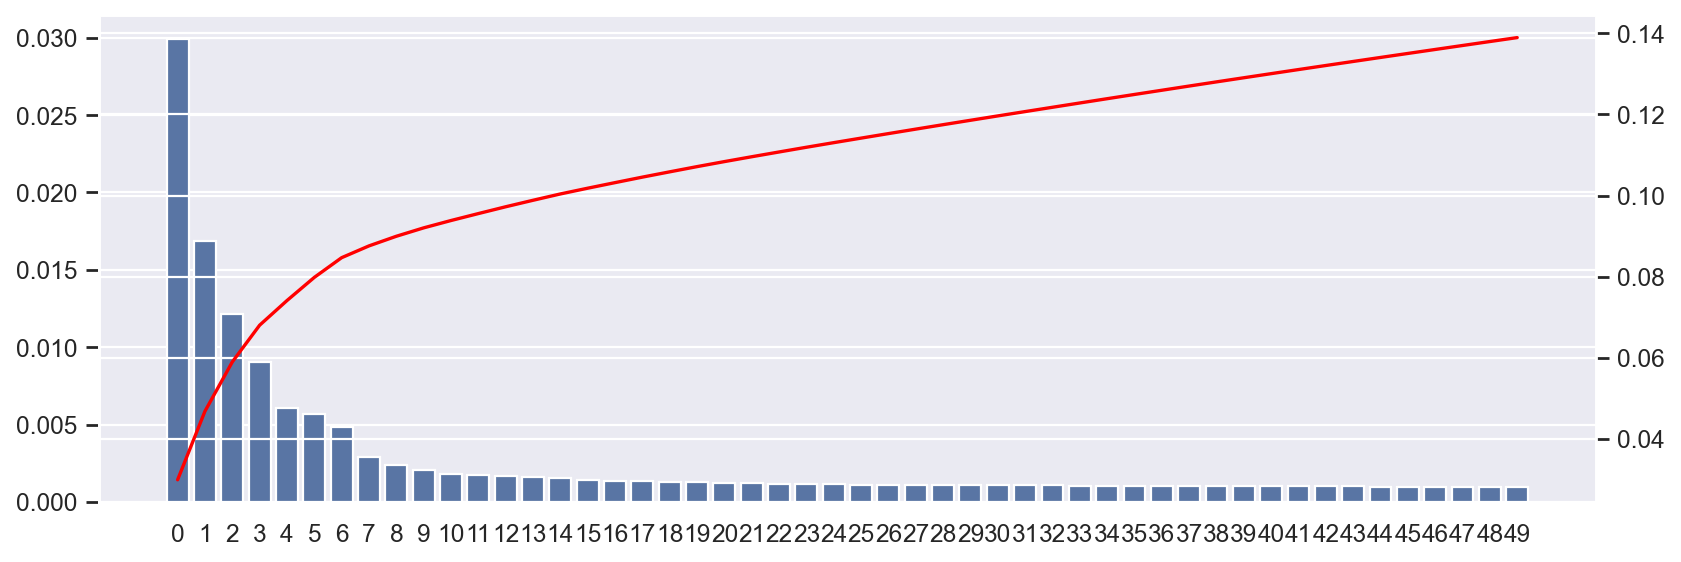

In [3]:
# evaluate the explained variance of each PC
tmp = adata.uns['pca']['variance_ratio']
sns.set(rc={'figure.figsize':(12, 4)})
fig, ax = plt.subplots()
sns.barplot(tmp, ax=ax)
ax2 = ax.twinx()
sns.lineplot(np.cumsum(tmp), ax=ax2, color="red")

In [4]:
# the majority of the explained variance comes from PCs 1-30, so we will cluster on those
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)

In [5]:
# then call the leiden alg.
sc.tl.leiden(adata)

In [6]:
# we will calculate multiple resolutions of leiden clustering to get a better sense
# for how our data clusters
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

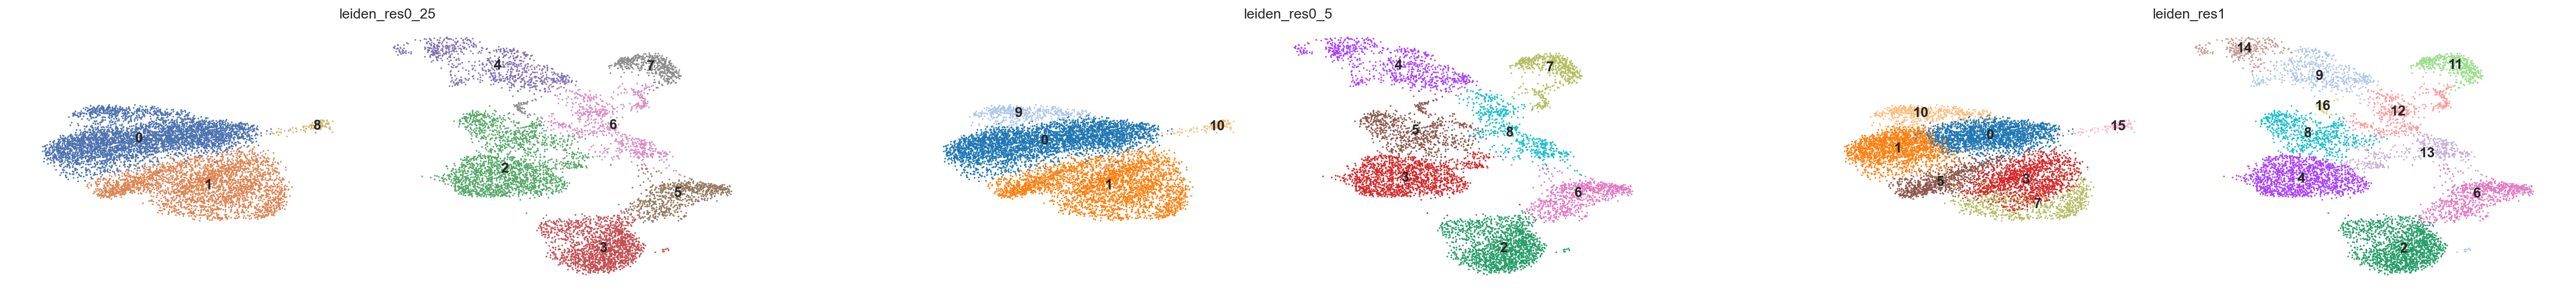

In [13]:

sc.pl.umap(adata, color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"], legend_loc="on data")

In [14]:
# save clustered data for annotation
adata.write("s4d8_clustered.h5ad")